In [41]:
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [42]:
data=pd.read_csv("BDs/CC GENERAL.csv")

data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [43]:
data=data.drop("CUST_ID", axis=1)

In [44]:
def clean(df,s):
    dfp=df.select_dtypes(exclude=['object'])
    if type(s)==int:
        return df.fillna(s)
    if s == "mean":
        for i in dfp.columns:
            df[i].fillna(df[i].mean(),inplace=True)
        return df
    if s == "median":
        for i in dfp.columns:
            return df.fillna(df.median(),inplace=True)
        return df
    if s == "mode":
        for i in df.columns:
            return df.fillna(df.mode()[0],inplace=True)
        return df
    return df.dropna()
clean(data,"median")

In [45]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [46]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


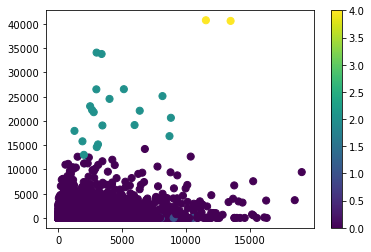

In [47]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["ONEOFF_PURCHASES"] , c= agglomerative[0], s=50)
plt.colorbar(scatter)

In [ ]:
plt.figure(figsize=(13,10))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

### k-means with 5 clusters


In [30]:
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [31]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,3
2,4
3,4
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [32]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[8.36638557e+02 8.52450540e-01 5.13646260e+02 2.50798678e+02
  2.63139567e+02 5.18993150e+02 4.51231569e-01 1.33100385e-01
  3.45502805e-01 1.12878342e-01 2.39031239e+00 9.61705862e+00
  2.31332700e+03 9.21209431e+02 5.16973504e+02 1.46055098e-01
  1.13832924e+01]
 [4.74238647e+03 9.26988635e-01 1.34554481e+04 9.59629156e+03
  3.85938573e+03 3.81121966e+03 8.41761344e-01 6.89599125e-01
  6.80681823e-01 1.55066260e-01 7.04166667e+00 1.00354167e+02
  1.30364583e+04 1.90446534e+04 2.57972783e+03 3.85151708e-01
  1.19583333e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [6.06634064e+03 9.62583360e-01 1.11589292e+03 6.54209546e+02
  4.61772764e+02 4.93766959e+03 3.91675469e-01 2.02685758e-01
  2.92708089e-01 3.95024778e-01 1.20040053e+01 1.70240320e+01
  1.02062143e+04

In [33]:
data['labels'] =labels


In [34]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [35]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

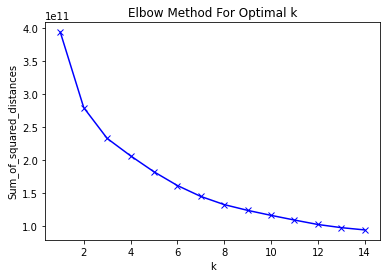

In [36]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### k-means with 3 clusters


In [40]:
data1=pd.read_csv("BDs/CC GENERAL.csv")
data1=data.drop("CUST_ID", axis=1)
clean(data1,"median")

KeyError: "['CUST_ID'] not found in axis"

In [37]:
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data1)

KMeans(n_clusters=3, random_state=0)

In [38]:
labels1=pd.DataFrame(kmeans.labels_)
labels1

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [39]:
kmeans.predict(data1)
print(kmeans.cluster_centers_)

[[8.55753626e+02 8.54436868e-01 6.06054710e+02 3.14167415e+02
  2.92185668e+02 4.95892245e+02 4.68032456e-01 1.54413824e-01
  3.52656892e-01 1.06807914e-01 2.25417241e+00 1.06900934e+01
  2.75058545e+03 9.99873123e+02 5.62142906e+02 1.57074116e-01
  1.14337774e+01 5.06201194e-01]
 [3.40173346e+03 9.40583815e-01 1.58123830e+03 9.87705905e+02
  5.93845306e+02 2.11634462e+03 5.39346598e-01 3.17087692e-01
  3.84604944e-01 2.10822215e-01 5.74868881e+00 2.21280594e+01
  9.01516807e+03 2.88949147e+03 1.55765080e+03 1.33859512e-01
  1.17373252e+01 3.65777972e+00]
 [4.80882923e+03 9.09847656e-01 1.07073796e+04 7.56195397e+03
  3.14559359e+03 5.19105119e+03 7.47270397e-01 5.95595015e-01
  5.99510939e-01 2.26083061e-01 9.17557252e+00 8.55496183e+01
  1.24660305e+04 1.80939666e+04 2.49355128e+03 3.33011382e-01
  1.18396947e+01 1.54961832e+00]]
